Instructions

**When taking this exam, you agree to follow the Duke Honor Code.**

- This is a closed book exam. You can use the `help()` function, and the `?` prefix or suffix but are restricted to a SINGLE browser tab.
- All necessary imports are provided. You should not need to import any other packages.
- Answer all 5 questions.

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import collections
import seaborn as sns
from functools import reduce
sns.set_context('notebook', font_scale=1.5)

**1**. 20 points

A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

Find the largest palindrome made from the product of two 3-digit numbers.

(Source: Project Euler Problem 4)

In [156]:
numbers = np.array([i*j for i in range(100,1000) for j in range(100,1000)],dtype = str)

In [157]:
palindromic = np.array([i for i in numbers if i[::-1] == i[:]],dtype = int)

In [158]:
result = [(i,j) for i in range(100,1000) for j in range(100,1000) if i*j == palindromic.max()]

In [159]:
palindromic.max(), result

(906609, [(913, 993), (993, 913)])

**2**. 20 points

Count the number of each unique word longer than 3 characters in the nursery rhyme given, ignoring case and removing punctuation.

```text
Humpty Dumpty sat on a wall,
Humpty Dumpty had a great fall;
All the king's horses and all the king's men
Couldn't put Humpty together again.
```

In [160]:
s = '''Humpty Dumpty sat on a wall,
Humpty Dumpty had a great fall;
All the king's horses and all the king's men
Couldn't put Humpty together again.'''

In [161]:
word3 = [i for i in s.lower().translate(str.maketrans("","",string.punctuation)).split() if len(i)>3]

In [162]:
count = {i:word3.count(i) for i in set(word3)}
count

{'again': 1,
 'couldnt': 1,
 'dumpty': 2,
 'fall': 1,
 'great': 1,
 'horses': 1,
 'humpty': 3,
 'kings': 2,
 'together': 1,
 'wall': 1}

**3**. 20 points

Create a DataFrame containing the standardized data for each row feature - that is, every row has mean 0 and standardized deviation 1. The DataFrame should have the same row and column names as the original.

In [163]:
df = pd.DataFrame(
    dict(ann=(23,67,1.6), bob=(24,92,1.7), dan=(30,89,1.8)), 
    index=['age', 'wt', 'ht'])

In [164]:
stddf = (df - df.mean(axis = 1)[:,np.newaxis]) / df.std(axis = 1)[:,np.newaxis]
stddf

ann       bob       dan
age -0.704361 -0.440225  1.144586
wt  -1.147708  0.683741  0.463967
ht  -1.000000  0.000000  1.000000

In [165]:
stddf.mean(axis=1)

age   -2.960595e-16
wt    -3.515706e-16
ht     7.401487e-16
dtype: float64

In [166]:
stddf.std(axis=1)

age    1.0
wt     1.0
ht     1.0
dtype: float64

**4**. 20 points

Download the `mtcars` data set as a Dataframe from https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv

and create the following panel of strip plots

![](./mtcars.png)

In [167]:
url = 'https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv'

In [168]:
car = pd.read_csv(url)
car_long = car.melt(id_vars = "carb")

In [169]:
car_filter = car_long[car_long.variable.isin(["mpg","hp","wt"])]

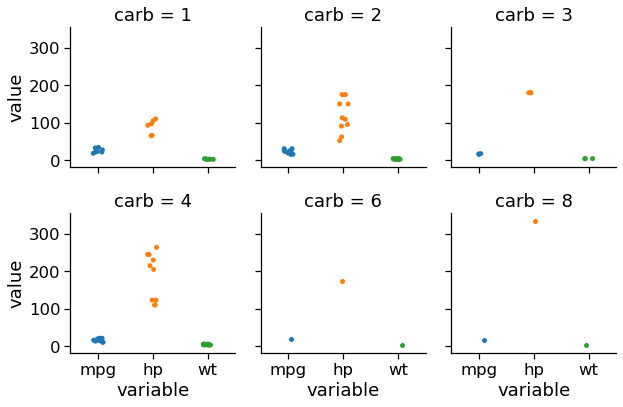

In [174]:
myplot = sns.catplot(x = "variable", y = "value", col = "carb", data = car_filter, col_wrap=3,height=3)
plt.savefig("mtcars.png")

**5**. 20 points

Given 

```
y = [ 1.70222116,  1.95783341, -0.51612387, -2.06639513, -2.41302321,
     -0.73439023,  1.84515596,  11.58990399, -1.68093127, -1.31909487]
y_pred = [ 1., 0.54030231, -0.41614684, -0.9899925 , -0.65364362,
          0.28366219,  0.96017029, 0.75390225, -0.14550003, -0.91113026]
```

find the residual sum of squares (RSS) - i.e. the sum of squared difference between `y` and `y_pred` , excluding any residual whose absolute value is greater or equal to 3. The residual or error is the difference between `y` and `y_pred`. Use only anonymous functions and the higher order functions map, reduce and filter to do so.

Do not use any of the following

- for loops
- comprehensions or generator expressions
- the sum function
- numpy

In [171]:
y = [ 1.70222116,  1.95783341, -0.51612387, -2.06639513, -2.41302321,
     -0.73439023,  1.84515596,  11.58990399, -1.68093127, -1.31909487]
y_pred = [ 1., 0.54030231, -0.41614684, -0.9899925 , -0.65364362,
          0.28366219,  0.96017029, 0.75390225, -0.14550003, -0.91113026]

In [172]:
reduce(lambda x,y: x+y, map(lambda x: x**2, filter(lambda x: abs(x)<3, map(lambda x,y: x-y,y,y_pred))))

11.110178128879657